In [1]:
from os import listdir
from os.path import isdir, join
from tensorflow.keras import layers, models
import numpy as np

In [2]:
all_targets = ['seven', 'eight', 'tree', 'no', 'off', 'four', 'right', 'happy', 'one', 'marvin', 'bird', 'wow', 'stop', 'dog', 'up', 'two', 'on', 'backward', 'nine', 'go', 'zero', 'three', 'six', 'left', 'learn', 'five', 'follow', 'sheila', 'house', 'bed', 'visual', 'cat', 'forward', 'down', 'yes']

In [3]:
feature_sets_path = './'
feature_sets_filename = 'all_targets_mfcc_sets.npz'
model_filename = 'speech_model.h5'

In [4]:
# Load feature sets
feature_sets = np.load(join(feature_sets_path, feature_sets_filename), allow_pickle=True)
print(feature_sets.files)

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']


In [5]:
# Assign feature sets
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']

In [6]:
# Look at tensor dimensions
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(77522, 16, 16)
(9684, 16, 16)
(9650, 16, 16)


In [7]:
# Peek at labels
print(y_val)

[18.  5. 11. ... 24.  3. 29.]


In [8]:
on_word_index = all_targets.index('on')
off_word_index = all_targets.index('off')
go_word_index = all_targets.index('go')
down_word_index = all_targets.index('down')
up_word_index = all_targets.index('up')
mask_on = y_train==on_word_index
mask_off = y_train==off_word_index
mask_go = y_train==go_word_index
mask_down = y_train==down_word_index
mask_up = y_train==up_word_index

In [9]:
y_train.fill(0)
y_train[mask_on]=1
y_train[mask_off]=2
y_train[mask_up]=3
y_train[mask_down]=4
y_train[mask_go]=5

In [10]:
mask_on = y_val==on_word_index
mask_off = y_val==off_word_index
mask_go = y_val==go_word_index
mask_down = y_val==down_word_index
mask_up = y_val==up_word_index

In [11]:
y_val.fill(0)
y_val[mask_on]=1
y_val[mask_off]=2
y_val[mask_up]=3
y_val[mask_down]=4
y_val[mask_go]=5

In [12]:
mask_on = y_test==on_word_index
mask_off = y_test==off_word_index
mask_go = y_test==go_word_index
mask_down = y_test==down_word_index
mask_up = y_test==up_word_index

In [13]:
y_test.fill(0)
y_test[mask_on]=1
y_test[mask_off]=2
y_test[mask_up]=3
y_test[mask_down]=4
y_test[mask_go]=5

In [14]:
y_train=y_train.reshape(-1,1)
y_val=y_val.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [15]:
# Peek at labels after conversion
print(y_val)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [27]:
# View the dimensions of our input data
print(x_train.shape)

(77522, 16, 16)


In [16]:
# CNN for TF expects (batch, height, width, channels)
# So we reshape the input tensors with a "color" channel of 1
x_train = x_train.reshape(x_train.shape[0], 
                          x_train.shape[1], 
                          x_train.shape[2], 
                          1)
x_val = x_val.reshape(x_val.shape[0], 
                      x_val.shape[1], 
                      x_val.shape[2], 
                      1)
x_test = x_test.reshape(x_test.shape[0], 
                        x_test.shape[1], 
                        x_test.shape[2], 
                        1)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(77522, 16, 16, 1)
(9684, 16, 16, 1)
(9650, 16, 16, 1)


In [17]:
# Input shape for CNN is size of MFCC of 1 sample
sample_shape = x_test.shape[1:]
print(sample_shape)

(16, 16, 1)


In [18]:
model = models.Sequential()

In [19]:
# Build model
# Based on: https://www.geeksforgeeks.org/python-image-classification-using-keras/
# model = models.Sequential()
model.add(layers.Conv2D(32, 
                        (2, 2), 
                        activation='relu',
                        input_shape=sample_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='softmax'))

In [20]:
x_train.shape

(77522, 16, 16, 1)

In [21]:
y_train.reshape(-1,1)

array([[0.],
       [0.],
       [0.],
       ...,
       [2.],
       [0.],
       [4.]])

In [22]:
# Display model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 15, 15, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 32)          4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 64)          8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [23]:
# Add training parameters to model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['acc'])

In [24]:
# Train
history = model.fit(x_train, 
                    y_train, 
                    epochs=30, 
                    batch_size=100, 
                    validation_data=(x_val, y_val))

Epoch 1/30
776/776 [==============================] - 8s 9ms/step - loss: 0.4924 - acc: 0.8802 - val_loss: 0.3885 - val_acc: 0.8964
Epoch 2/30
776/776 [==============================] - 6s 8ms/step - loss: 0.3542 - acc: 0.9000 - val_loss: 0.3461 - val_acc: 0.9076
Epoch 3/30
776/776 [==============================] - 6s 8ms/step - loss: 0.3003 - acc: 0.9107 - val_loss: 0.3315 - val_acc: 0.8846
Epoch 4/30
776/776 [==============================] - 6s 8ms/step - loss: 0.2669 - acc: 0.9208 - val_loss: 0.2438 - val_acc: 0.9284
Epoch 5/30
776/776 [==============================] - 7s 9ms/step - loss: 0.2459 - acc: 0.9264 - val_loss: 0.2296 - val_acc: 0.9334
Epoch 6/30
776/776 [==============================] - 8s 10ms/step - loss: 0.2342 - acc: 0.9302 - val_loss: 0.2620 - val_acc: 0.9309
Epoch 7/30
776/776 [==============================] - 7s 9ms/step - loss: 0.2260 - acc: 0.9321 - val_loss: 0.2250 - val_acc: 0.9403
Epoch 8/30
776/776 [==============================] - 7s 9ms/step - loss: 0

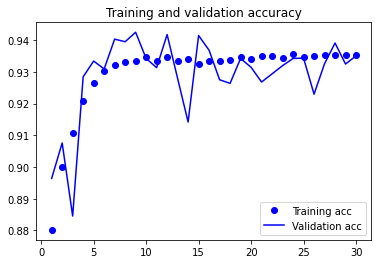

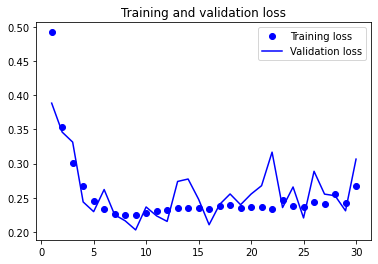

In [25]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [26]:
# Save the model as a file
models.save_model(model, model_filename)

In [27]:
for i in range(0, 110):
   print(' i:',i, 'Answer:', y_test[i], ' Prediction:', model.predict(np.expand_dims(x_test[i], 0)))

 i: 0 Answer: [4.]  Prediction: [[1.8255571e-04 2.3501723e-38 7.3017961e-25 6.2472281e-24 9.9981743e-01
  1.0764765e-37]]
 i: 1 Answer: [0.]  Prediction: [[9.9980921e-01 1.1744083e-06 5.9204311e-05 4.1727421e-06 9.7572040e-05
  2.8647113e-05]]
 i: 2 Answer: [0.]  Prediction: [[9.2462635e-01 3.3218381e-03 7.3209316e-03 7.3706458e-04 1.4579106e-02
  4.9414642e-02]]
 i: 3 Answer: [0.]  Prediction: [[1.0000000e+00 3.4533735e-33 1.0603549e-33 3.1417044e-27 7.5063175e-34
  0.0000000e+00]]
 i: 4 Answer: [5.]  Prediction: [[9.18293837e-04 5.59224605e-26 8.83824353e-17 1.40607032e-36
  1.05536354e-26 9.99081731e-01]]
 i: 5 Answer: [5.]  Prediction: [[1.0471748e-04 3.6174371e-28 3.1211597e-15 1.4418666e-37 2.3966087e-25
  9.9989522e-01]]
 i: 6 Answer: [0.]  Prediction: [[7.3506683e-01 6.1693507e-05 5.7518923e-07 6.5505178e-11 2.8713474e-08
  2.6487082e-01]]
 i: 7 Answer: [0.]  Prediction: [[9.9996686e-01 7.3951861e-07 4.1227809e-06 2.7808621e-05 4.4454026e-07
  1.3718644e-08]]
 i: 8 Answer: [0.]